<a href="https://colab.research.google.com/github/JamesHelloween/Data-Science/blob/main/FinalDatascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
weather_data_path = 'weather_description.csv'
weather_data = pd.read_csv(weather_data_path)
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
weather_data_ny = weather_data[['New York', 'datetime']]
weather_data_ny = weather_data_ny[weather_data_ny['datetime'].dt.month == 5]
weather_data_ny = weather_data_ny[weather_data_ny['datetime'].dt.day == 15]

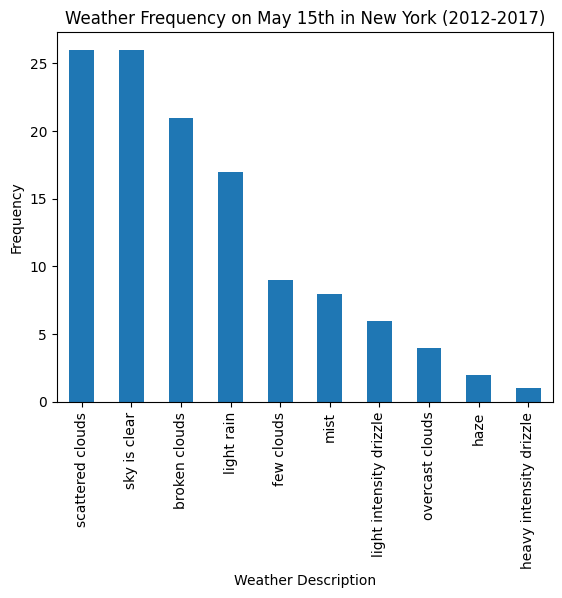

In [ ]:
weather_counts = weather_data_ny['New York'].value_counts()
weather_counts.plot(kind='bar')
plt.title('Weather Frequency on May 15th in New York (2012-2017)')
plt.xlabel('Weather Description')
plt.ylabel('Frequency')
plt.show()

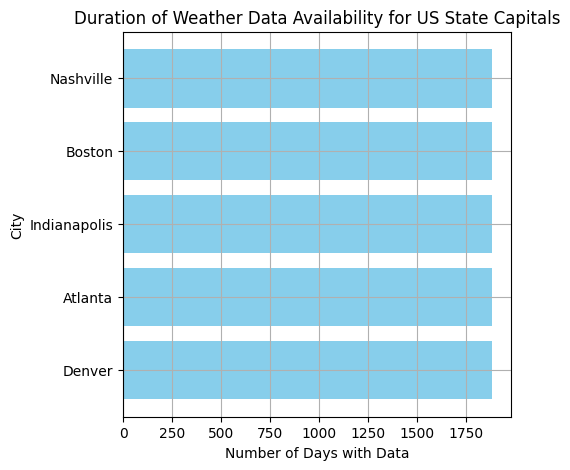

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
weather_data_path = 'weather_description.csv'
weather_data = pd.read_csv(weather_data_path)

# Convert 'datetime' column to datetime objects for easier manipulation
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# List of US capital cities (ensure these match the dataset's column names)
capital_cities = [
    "Washington D.C.", "Sacramento", "Denver", "Tallahassee", "Atlanta",
    "Honolulu", "Boise", "Springfield", "Indianapolis", "Des Moines",
    "Topeka", "Frankfort", "Baton Rouge", "Augusta", "Annapolis",
    "Boston", "Lansing", "Saint Paul", "Jackson", "Jefferson City",
    "Helena", "Lincoln", "Carson City", "Concord", "Trenton",
    "Santa Fe", "Albany", "Raleigh", "Bismarck", "Columbus",
    "Oklahoma City", "Salem", "Harrisburg", "Providence", "Columbia",
    "Pierre", "Nashville", "Austin", "Salt Lake City", "Montpelier",
    "Richmond", "Olympia", "Charleston", "Madison", "Cheyenne"
]

# Filter data to include only capital cities and calculate the duration of data for each
data_durations = {}
for city in capital_cities:
    if city in weather_data.columns:
        city_data = weather_data[['datetime', city]].dropna()
        if not city_data.empty:
            start_date = city_data['datetime'].min()
            end_date = city_data['datetime'].max()
            duration_days = (end_date - start_date).days
            data_durations[city] = duration_days

# Sort cities by duration to make the plot easier to interpret
sorted_cities = sorted(data_durations.items(), key=lambda x: x[1], reverse=True)

# Extracting labels and values
cities, durations = zip(*sorted_cities)

# Create bar chart
plt.figure(figsize=(5, 5))
plt.barh(cities, durations, color='skyblue')
plt.xlabel('Number of Days with Data')
plt.ylabel('City')
plt.title('Duration of Weather Data Availability for US State Capitals')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('temperature.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# For simplicity, using temperature for New York
new_york_temp = data['New York'].dropna()

# Resample hourly data to daily averages
new_york_daily = new_york_temp.resample('D').mean()

# Baseline Model: Weighted Average for Commencement Day (May 15)
commencement_date = '05-15'
commencement_temps = new_york_daily[new_york_daily.index.strftime('%m-%d') == commencement_date]

weights = np.arange(1, len(commencement_temps) + 1)  # Increasing weights for recent years
weighted_avg_temperature = np.average(commencement_temps, weights=weights)

# Prepare data for extended model: Day of Year vs Temperature
X = new_york_daily.index.dayofyear.values.reshape(-1, 1)  # Day of year as feature
y = new_york_daily.values  # Temperature as target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

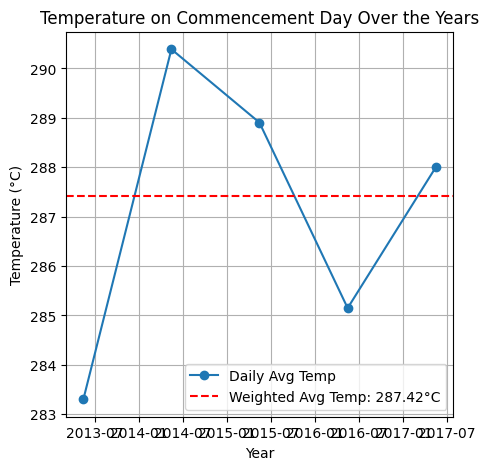

In [ ]:
# RMSE Calculations
rmse_baseline = np.sqrt(mean_squared_error(y_test, np.full_like(y_test, weighted_avg_temperature)))
rmse_linear = np.sqrt(mean_squared_error(y_test, predicted))

# Plotting the Baseline Temperature (Commencement Day)
plt.figure(figsize=(5, 5))
plt.plot(commencement_temps.index, commencement_temps, marker='o', linestyle='-', label='Daily Avg Temp')
plt.axhline(y=weighted_avg_temperature, color='r', linestyle='--', label=f'Weighted Avg Temp: {weighted_avg_temperature:.2f}°C')
plt.title('Temperature on Commencement Day Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


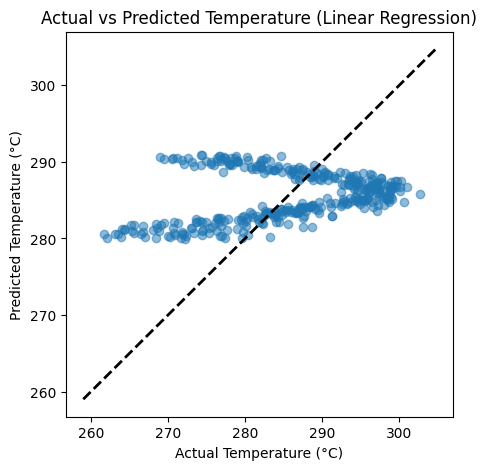

In [ ]:
# Plotting Actual vs Predicted Temperature for Extended Model
plt.figure(figsize=(5, 5))
plt.scatter(y_test, predicted, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature (Linear Regression)')
plt.show()

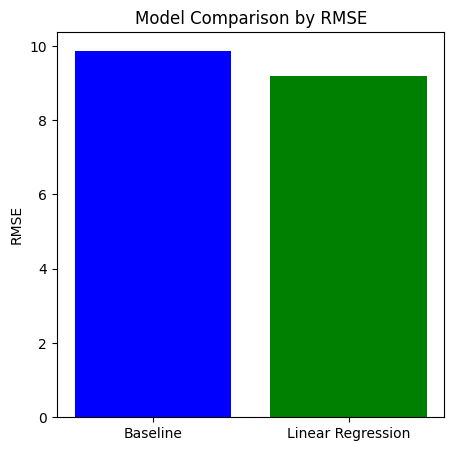

In [ ]:

# RMSE Comparison
plt.figure(figsize=(5, 5))
plt.bar(['Baseline', 'Linear Regression'], [rmse_baseline, rmse_linear], color=['blue', 'green'])
plt.ylabel('RMSE')
plt.title('Model Comparison by RMSE')
plt.show()

In [1]:
# Clone the repository
!git clone https://github.com/JamesHelloween/Data-Science

Cloning into 'Data-Science'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 578.88 KiB | 17.54 MiB/s, done.
